In [1]:
#Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing dataset

dataset = pd.read_excel(r'C:\Users\sanla\Desktop\Prediction of CO Conversion\Dataset_Intern.xlsx')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

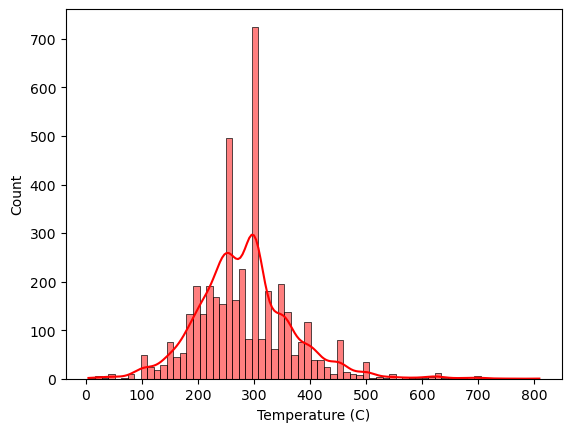

In [3]:
#Plotting Histogram to check for distribution

import seaborn as sns
sns.histplot(data = dataset, x = 'Temperature (C)', kde = True, color = 'red')
plt.show()

In [4]:
#Checking for Normality

from scipy.stats import shapiro
f = dataset.columns.values
for i in f:
    stat, p = shapiro(dataset[i])
    if p < 0.05:
        print('Yes')
    else:
        print('No')

Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes


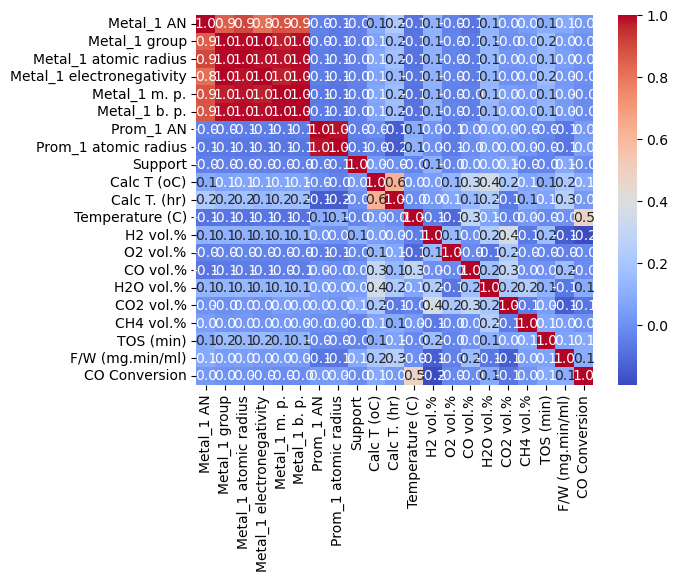

In [5]:
#Correlation Matrix

c_m = dataset.corr()
sns.heatmap(c_m, annot = True, cmap = 'coolwarm', fmt = ".1f")
plt.show()

In [6]:
#Splitting data into train and test sets

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [7]:
#Feature scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [8]:
#Building Base Regressor Model

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0, n_jobs = -1)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [9]:
#Predicted vs Actual Comparison

y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[62.74 89.8 ]
 [60.79 99.4 ]
 [33.61 24.2 ]
 ...
 [11.81 20.6 ]
 [74.23  4.71]
 [21.85 22.4 ]]


In [10]:
#R2 score and MSE of test data

from sklearn.metrics import r2_score, mean_squared_error, make_scorer
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(score)
print(mse)

0.6261956407818609
403.2871339073773


In [11]:
#K - Fold Cross Validation

from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error)
scores = cross_val_score(estimator = regressor, X = x_train, y = y_train, scoring = 'r2', cv = 10)
amse = cross_val_score(estimator = regressor, X = x_train, y = y_train, scoring = scorer, cv = 10)
print(scores.mean() * 100)
print(scores.std() * 100)
print(amse.mean())

76.9588414168731
4.381469620026824
238.97164992516437


In [12]:
#Grid Search

from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators' : [326],
             'criterion' : ['poisson'],
               'max_depth' : [None],
               'min_samples_split' : [2],
               'min_samples_leaf' : [1],
               'max_samples' : [1.0],
               'max_features' : [0.2]
              }]
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                          cv = 15,
                          n_jobs = -1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=15, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'criterion': ['poisson'], 'max_depth': [None],
                          'max_features': [0.2], 'max_samples': [1.0],
                          'min_samples_leaf': [1], 'min_samples_split': [2],
                          'n_estimators': [326]}],
             scoring='r2')

In [13]:
print(grid_search.best_score_)

0.8089539641727753


In [14]:
print(grid_search.best_params_)

{'criterion': 'poisson', 'max_depth': None, 'max_features': 0.2, 'max_samples': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 326}


In [15]:
amse = cross_val_score(estimator = grid_search, X = x_train, y = y_train, scoring = scorer, cv = 15)
print(amse.mean())

197.57627837934757
